In [1]:
library(data.table)
library(cowplot)
library(Matrix)
library(BuenColors)
# library(stringr)
# library(cowplot)
# library(dplyr)
# library(SummarizedExperiment)
# library(chromVAR)
# library(BSgenome.Hsapiens.UCSC.hg19)
# library(JASPAR2016)
# library(motifmatchr)
# library(GenomicRanges)
# library(irlba)
# library(cicero)
# library(umap)
# library(cisTopic)
# library(prabclus)
# library(BrockmanR)
# library(jackstraw)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: MASS


#### define functions

In [2]:
plot_umap <- function(df_umap,labels,title='UMAP',colormap=colormap){
    set.seed(2019) 
    df_umap = data.frame(cbind(df_umap,labels),stringsAsFactors = FALSE)
    colnames(df_umap) = c('umap1','umap2','celltype')
    df_umap$umap1 = as.numeric(df_umap$umap1)
    df_umap$umap2 = as.numeric(df_umap$umap2)
    options(repr.plot.width=4, repr.plot.height=4)
    p <- ggplot(shuf(df_umap), aes(x = umap1, y = umap2, color = celltype)) +
      geom_point(size = 1) + scale_color_manual(values = colormap) +
      ggtitle(title)
    return(p)
}

### Input

In [3]:
workdir = './bonemarrow_noisy02_results/'
path_fig = paste0(workdir,'figures/')
system(paste0('mkdir -p ',path_fig))

In [4]:
figname = "simulated_bonemarrow_noisy02.pdf"

In [5]:
path_umap = paste0(workdir,'umap_rds/')

In [6]:
se = readRDS(paste0(workdir,'se.rds'))

In [7]:
se

class: RangedSummarizedExperiment 
dim: 147303 1200 
metadata(0):
assays(1): counts
rownames(147303): chr1_9942_10442 chr1_12478_12978 ...
  chrX_155258152_155258652 chrX_155259892_155260392
rowData names(0):
colnames(1200): CD4_1 CD4_2 ... NK_1199 NK_1200
colData names(1): celltype

In [8]:
labels = se@colData$celltype
colormap = jdb_color_maps

In [9]:
for (df in sapply(strsplit(list.files(path_umap), "\\."),'[',1)){
  assign(df,readRDS(paste0(path_umap,df,'.rds')))
}

In [10]:
ls()

[1] "colormap"                "df"                     
 [3] "df_umap_BROCKMAN"        "df_umap_chromVAR_kmer"  
 [5] "df_umap_chromVAR_kmer2"  "df_umap_chromVAR_motif" 
 [7] "df_umap_chromVAR_motif2" "df_umap_Cicero"         
 [9] "df_umap_Cicero2"         "df_umap_cisTopic"       
[11] "df_umap_control"         "df_umap_GeneScoring"    
[13] "df_umap_GeneScoring2"    "df_umap_LSI"            
[15] "df_umap_scABC"           "df_umap_scABC2"         
[17] "df_umap_Scasat"          "df_umap_SCRAT"          
[19] "df_umap_SCRAT2"          "df_umap_SnapATAC"       
[21] "figname"                 "labels"                 
[23] "path_fig"                "path_umap"              
[25] "plot_umap"               "se"                     
[27] "workdir"

#### Control Group

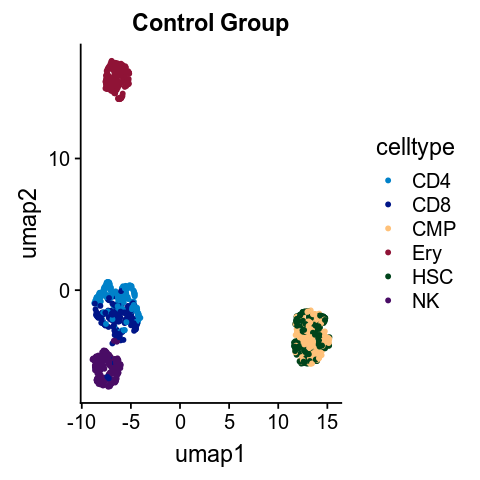

In [11]:
p_control <- plot_umap(df_umap_control,labels = labels,colormap = colormap,title='Control Group')
p_control

#### chromVAR

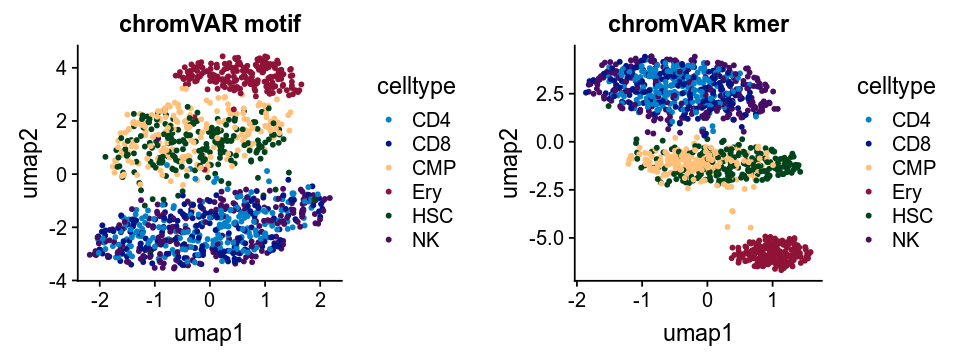

In [12]:
p_chromVAR_motif <- plot_umap(df_umap_chromVAR_motif,labels = labels,colormap = colormap,title='chromVAR motif')
p_chromVAR_kmer <- plot_umap(df_umap_chromVAR_kmer,labels = labels,colormap = colormap,title='chromVAR kmer')

options(repr.plot.width=8, repr.plot.height=3)
cowplot::plot_grid(p_chromVAR_motif,p_chromVAR_kmer)

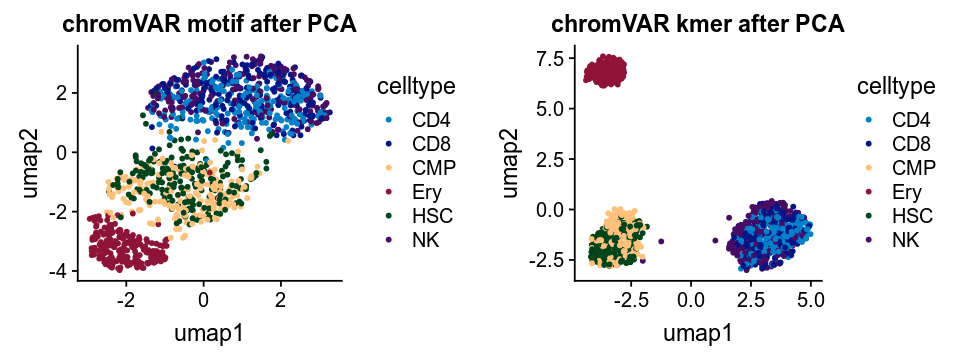

In [13]:
p_chromVAR_motif2 <- plot_umap(df_umap_chromVAR_motif2,labels = labels,colormap = colormap,title='chromVAR motif after PCA')
p_chromVAR_kmer2 <- plot_umap(df_umap_chromVAR_kmer2,labels = labels,colormap = colormap,title='chromVAR kmer after PCA')

options(repr.plot.width=8, repr.plot.height=3)
cowplot::plot_grid(p_chromVAR_motif2,p_chromVAR_kmer2)

### LSI

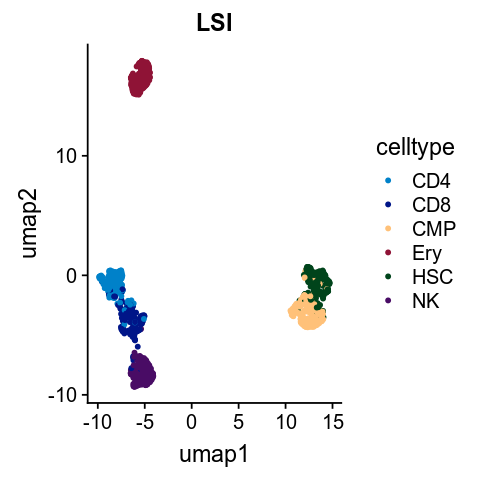

In [14]:
p_LSI <- plot_umap(df_umap_LSI,labels = labels,colormap = colormap,title='LSI')
p_LSI

### cisTopic

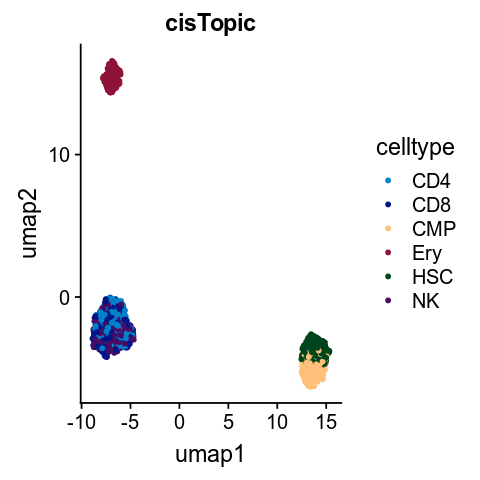

In [15]:
p_cisTopic <- plot_umap(df_umap_cisTopic,labels = labels,colormap = colormap,title='cisTopic')
p_cisTopic

### Gene Scoring

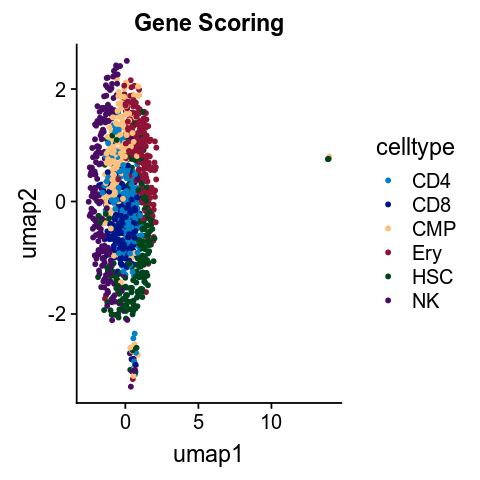

In [16]:
p_GeneScoring <- plot_umap(df_umap_GeneScoring,labels = labels,colormap = colormap,title='Gene Scoring')
p_GeneScoring

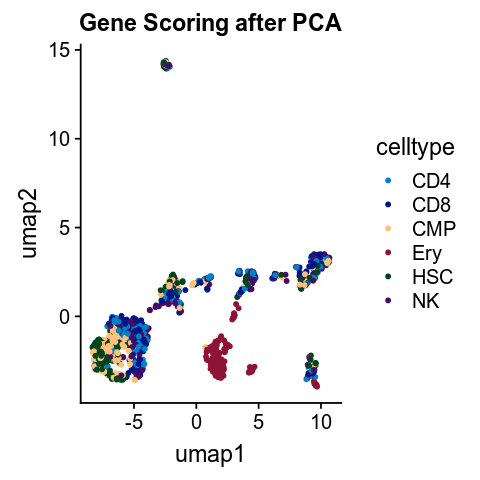

In [17]:
p_GeneScoring2 <- plot_umap(df_umap_GeneScoring2,labels = labels,colormap = colormap,title='Gene Scoring after PCA')
p_GeneScoring2

### Cicero

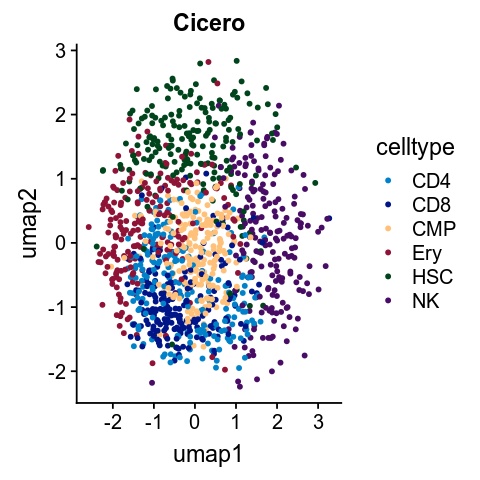

In [18]:
p_Cicero <- plot_umap(df_umap_Cicero,labels = labels,colormap = colormap,title='Cicero')
p_Cicero

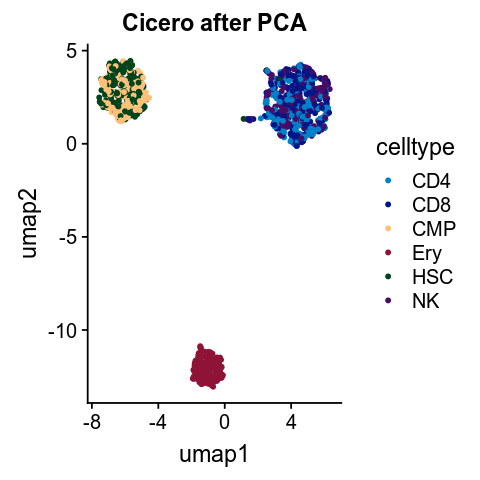

In [19]:
p_Cicero2 <- plot_umap(df_umap_Cicero2,labels = labels,colormap = colormap,title='Cicero after PCA')
p_Cicero2

### SnapATAC

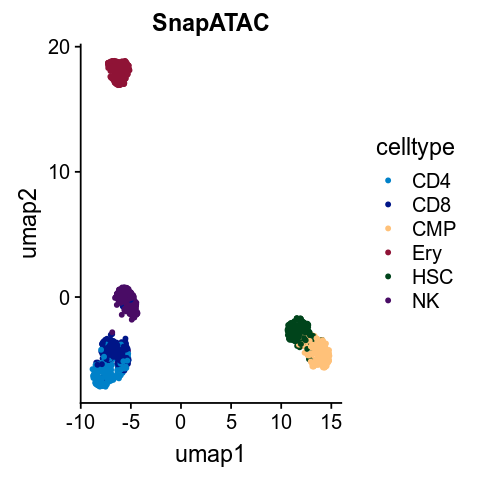

In [20]:
p_SnapATAC <- plot_umap(df_umap_SnapATAC,labels = labels,colormap = colormap,title='SnapATAC')
p_SnapATAC

### scABC

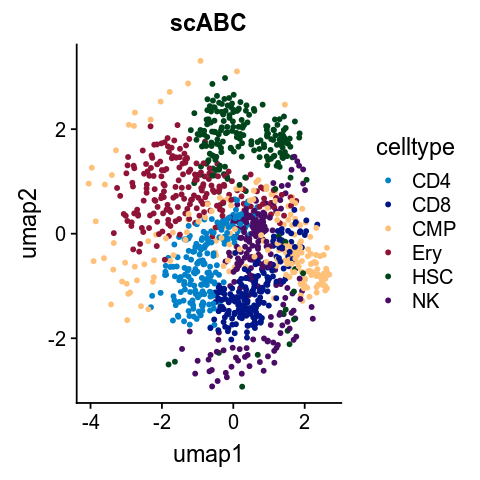

In [21]:
p_scABC <- plot_umap(df_umap_scABC,labels = labels,colormap = colormap,title='scABC')
p_scABC

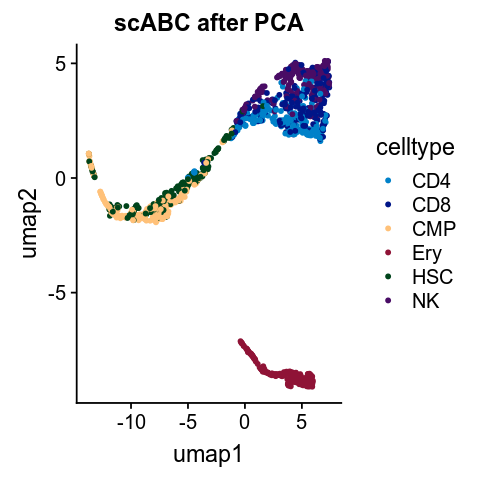

In [22]:
p_scABC2 <- plot_umap(df_umap_scABC2,labels = labels,colormap = colormap,title='scABC after PCA')
p_scABC2

### SCRAT

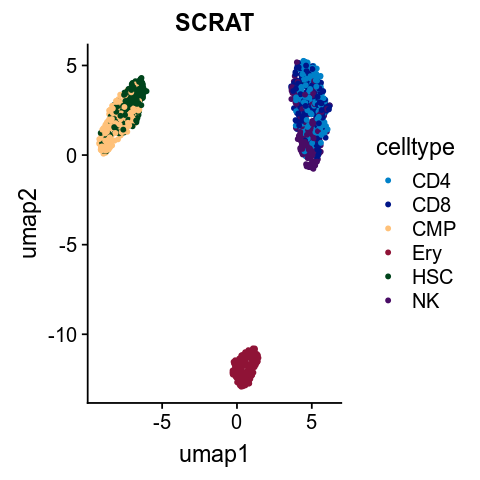

In [23]:
p_SCRAT <- plot_umap(df_umap_SCRAT,labels = labels,colormap = colormap,title='SCRAT')
p_SCRAT

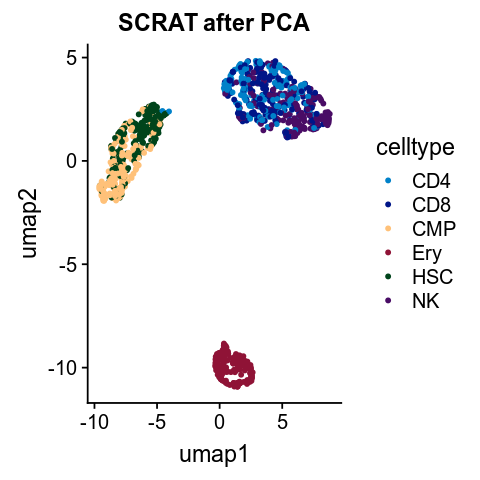

In [24]:
p_SCRAT2 <- plot_umap(df_umap_SCRAT2,labels = labels,colormap = colormap,title='SCRAT after PCA')
p_SCRAT2

### Scasat

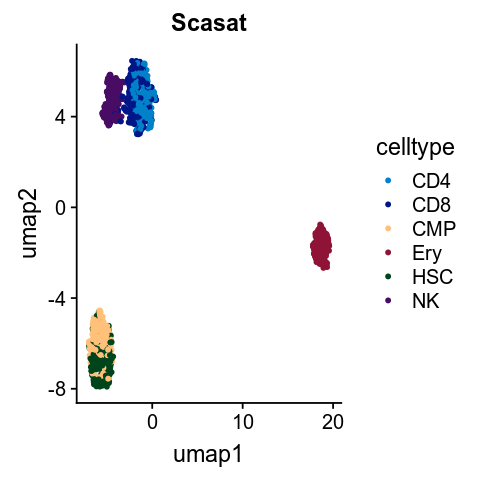

In [25]:
p_Scasat <- plot_umap(df_umap_Scasat,labels = labels,colormap = colormap,title='Scasat')
p_Scasat

### BROCKMAN

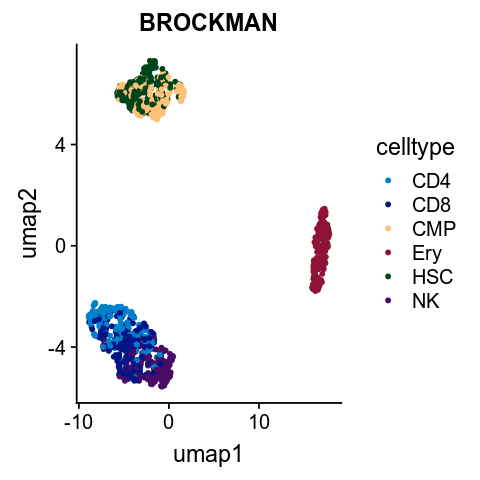

In [26]:
p_BROCKMAN <- plot_umap(df_umap_BROCKMAN,labels = labels,colormap = colormap,title='BROCKMAN')
p_BROCKMAN

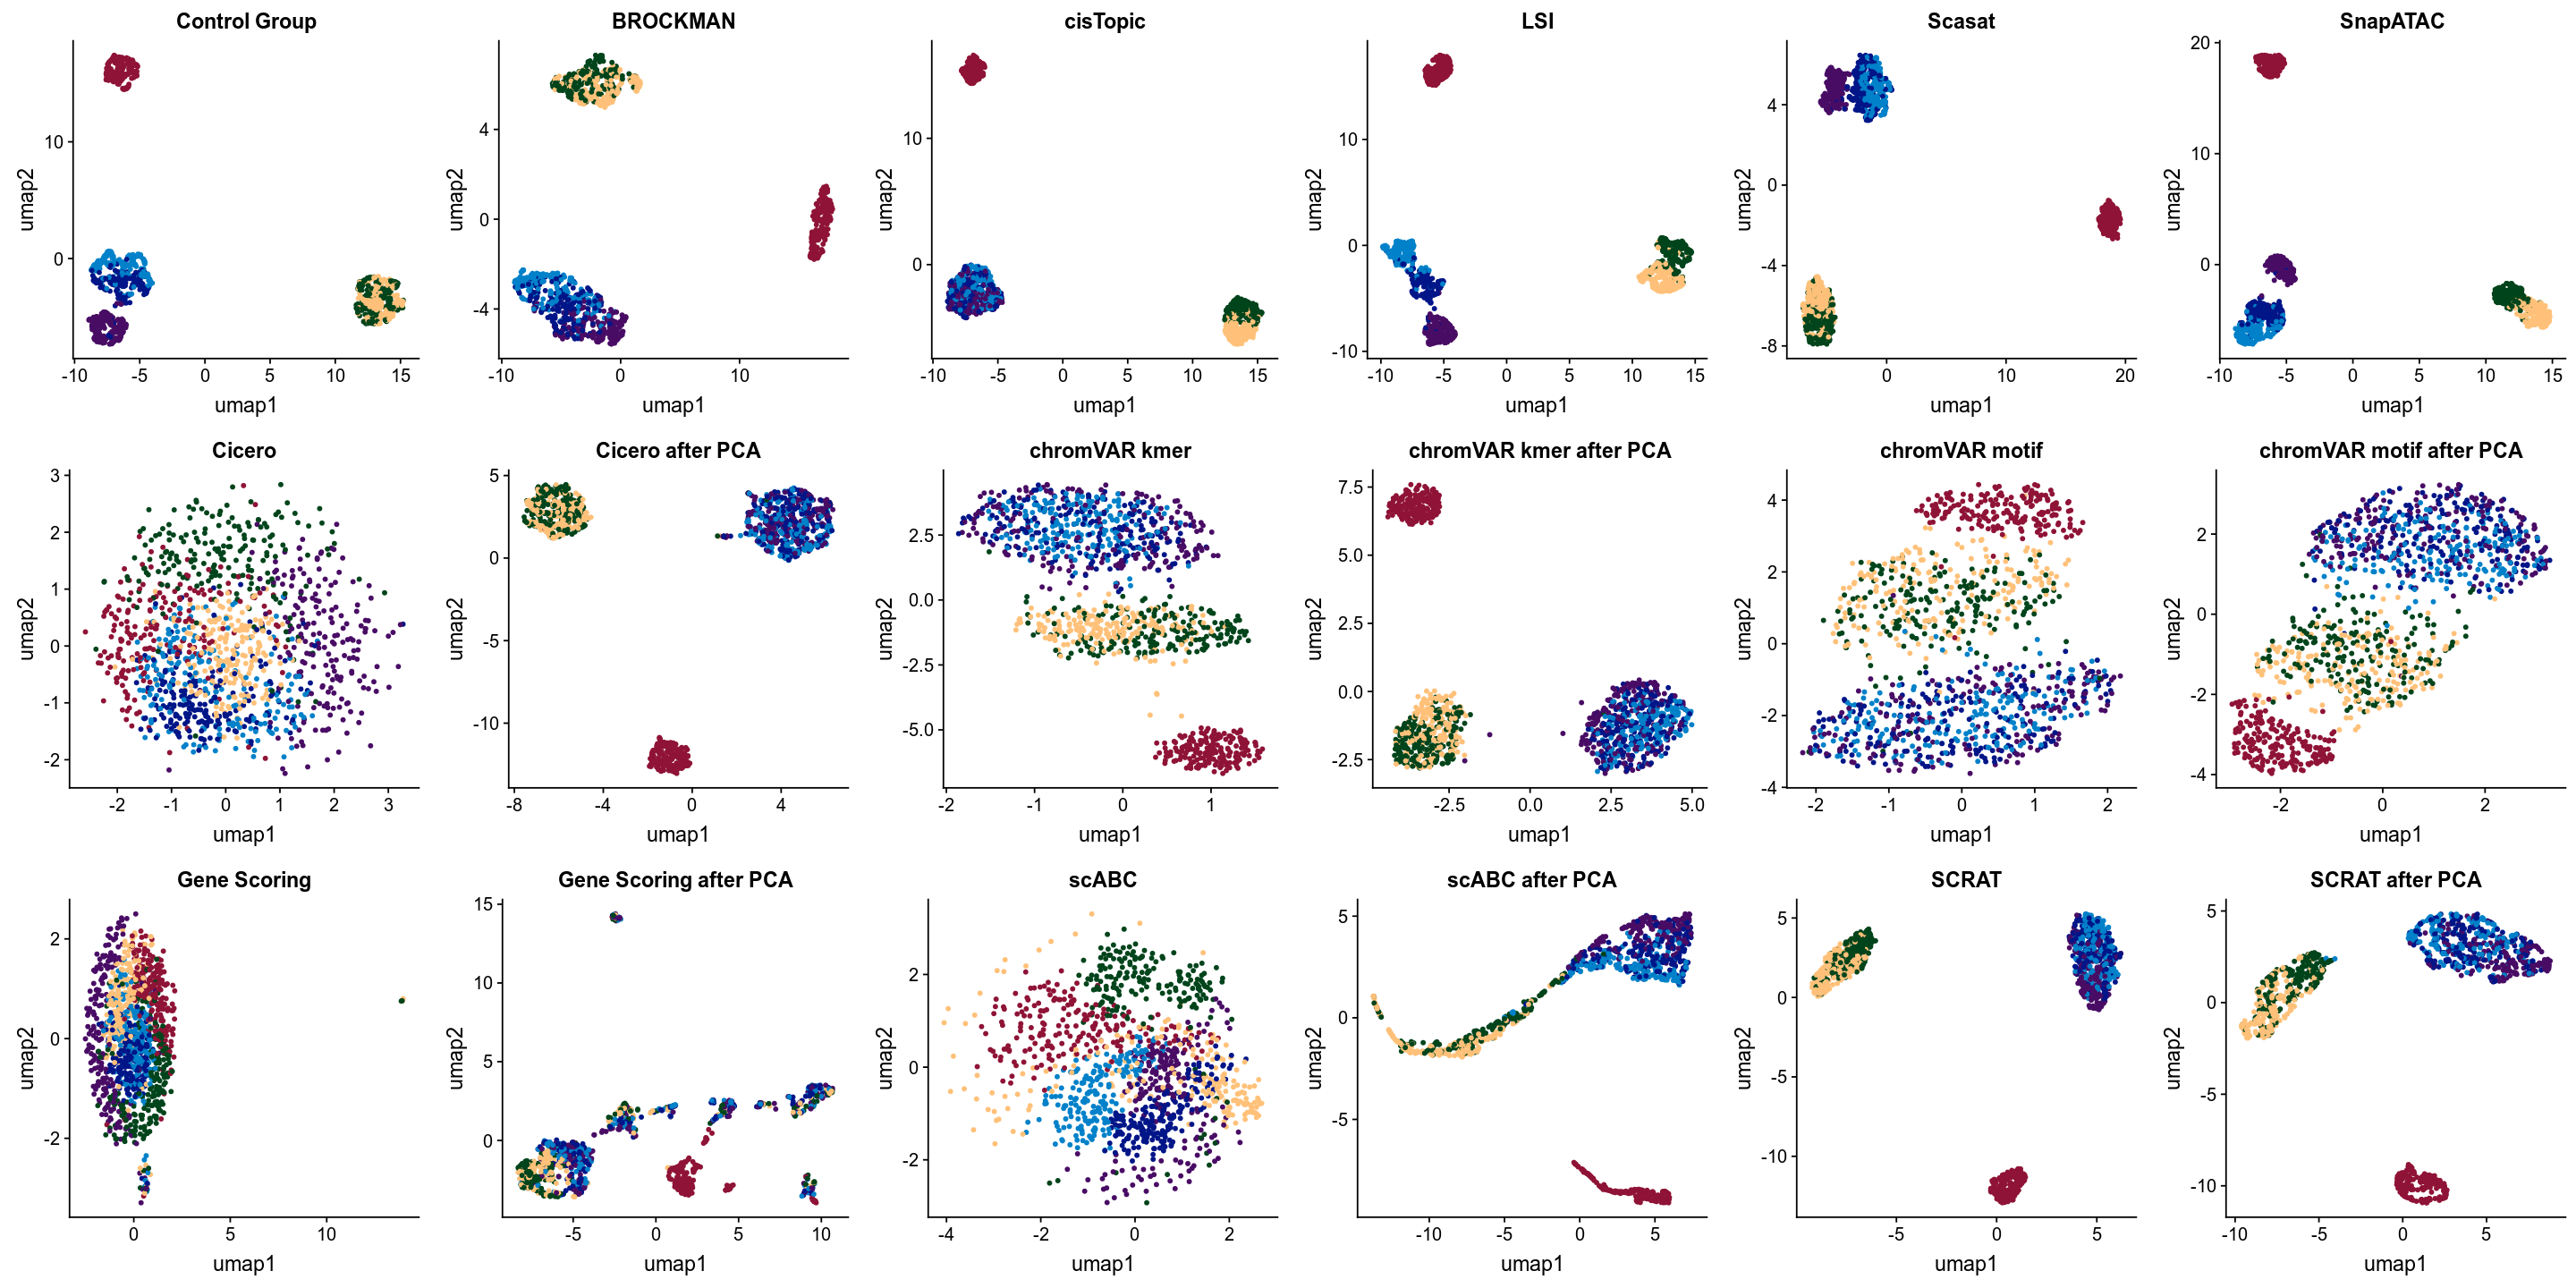

In [33]:
options(repr.plot.width=4*6, repr.plot.height=4*3)
cowplot::plot_grid(p_control+theme(legend.position = "none"),
                   p_BROCKMAN+theme(legend.position = "none"),
                   p_cisTopic+theme(legend.position = "none"),
                   p_LSI+theme(legend.position = "none"),
                   p_Scasat+theme(legend.position = "none"),  
                   p_SnapATAC+theme(legend.position = "none"),         
                   p_Cicero+theme(legend.position = "none"),p_Cicero2+theme(legend.position = "none"),
                   p_chromVAR_kmer+theme(legend.position = "none"),p_chromVAR_kmer2+theme(legend.position = "none"),
                   p_chromVAR_motif+theme(legend.position = "none"),p_chromVAR_motif2+theme(legend.position = "none"),
                   p_GeneScoring+theme(legend.position = "none"),p_GeneScoring2+theme(legend.position = "none"),
                   p_scABC+theme(legend.position = "none"),p_scABC2+theme(legend.position = "none"),
                   p_SCRAT+theme(legend.position = "none"),p_SCRAT2+theme(legend.position = "none"),
                   labels = "",ncol = 6)

In [ ]:
options(repr.plot.width=4*6, repr.plot.height=4*3)
cowplot::ggsave(cowplot::plot_grid(p_control+theme(legend.position = "none"),
                   p_BROCKMAN+theme(legend.position = "none"),
                   p_cisTopic+theme(legend.position = "none"),
                   p_LSI+theme(legend.position = "none"),
                   p_Scasat+theme(legend.position = "none"),  
                   p_SnapATAC+theme(legend.position = "none"),         
                   p_Cicero+theme(legend.position = "none"),p_Cicero2+theme(legend.position = "none"),
                   p_chromVAR_kmer+theme(legend.position = "none"),p_chromVAR_kmer2+theme(legend.position = "none"),
                   p_chromVAR_motif+theme(legend.position = "none"),p_chromVAR_motif2+theme(legend.position = "none"),
                   p_GeneScoring+theme(legend.position = "none"),p_GeneScoring2+theme(legend.position = "none"),
                   p_scABC+theme(legend.position = "none"),p_scABC2+theme(legend.position = "none"),
                   p_SCRAT+theme(legend.position = "none"),p_SCRAT2+theme(legend.position = "none"),
                   labels = "",ncol = 6),
                filename = paste0(path_fig,figname), width = 4*6, height = 4*3)

Loading required package: magrittr

Attaching package: ‘ggpubr’

The following object is masked from ‘package:cowplot’:

    get_legend

Saving 6.67 x 6.67 in image


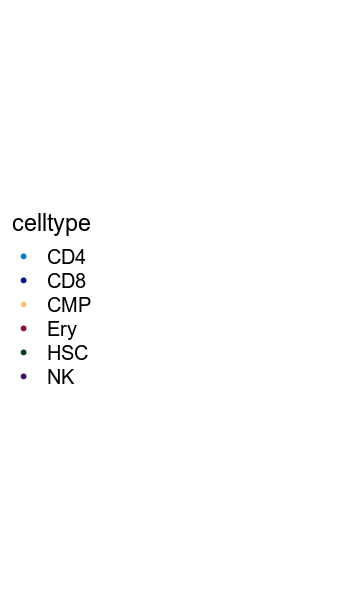

In [35]:
options(repr.plot.width=3, repr.plot.height=5)
library(ggpubr)
leg <- cowplot::get_legend(p_control)

p_legend = as_ggplot(leg)
p_legend
cowplot::ggsave(file=paste0(path_fig,'bonemarrow_noisy_0.2_legend.pdf'), p_legend)